In [1]:
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd

In [3]:
reservoirsShapefilePath = '/home/lamductan/Hydroviet/github/DataNotebook/reservoirsShapefile/'
aoi2Path = reservoirsShapefilePath + 'aoi2reservoirs'
aoi2Reservoirs = gpd.read_file(aoi2Path)

In [4]:
aoi2Reservoirs

FID_AOI2_C   COUNTRY ISO_CC COUNTRYAFF CONTINENT     Land_Type  \
0             3     China     CN      China      Asia  Primary land   
1             3     China     CN      China      Asia  Primary land   
2             3     China     CN      China      Asia  Primary land   
3             3     China     CN      China      Asia  Primary land   
4             3     China     CN      China      Asia  Primary land   
5             3     China     CN      China      Asia  Primary land   
6             3     China     CN      China      Asia  Primary land   
7             3     China     CN      China      Asia  Primary land   
8             3     China     CN      China      Asia  Primary land   
9             3     China     CN      China      Asia  Primary land   
10            3     China     CN      China      Asia  Primary land   
11            3     China     CN      China      Asia  Primary land   
12            3     China     CN      China      Asia  Primary land   
13            3     China     CN      China      Asia  Primary land   
14            3     China     CN      China      Asia  Primary land   
15            3     China     CN      China      Asia  Primary land   
16            3     China     CN      China      Asia  Primary land   
17            3     China     CN      China      Asia  Primary land   
18            3     China     CN      China      Asia  Primary land   
19            3     China     CN      China      Asia  Primary land   
20            3     China     CN      China      Asia  Primary land   
21            3     China     CN      China      Asia  Primary land   
22            3     China     CN      China      Asia  Primary land   
23            3     China     CN      China      Asia  Primary land   
24            3     China     CN      China      Asia  Primary land   
25            3     China     CN      China      Asia  Primary land   
26            3     China     CN      China      Asia  Primary land   
27            3     China     CN      China      Asia  Primary land   
28            3     China     CN      China      Asia  Primary land   
29            3     China     CN      China      Asia  Primary land   
..          ...       ...    ...        ...       ...           ...   
85           11  Thailand     TH   Thailand      Asia  Primary land   
86           11  Thailand     TH   Thailand      Asia  Primary land   
87           11  Thailand     TH   Thailand      Asia  Primary land   
88           11  Thailand     TH   Thailand      Asia  Primary land   
89           11  Thailand     TH   Thailand      Asia  Primary land   
90           11  Thailand     TH   Thailand      Asia  Primary land   
91           11  Thailand     TH   Thailand      Asia  Primary land   
92           11  Thailand     TH   Thailand      Asia  Primary land   
93           11  Thailand     TH   Thailand      Asia  Primary land   
94           11  Thailand     TH   Thailand      Asia  Primary land   
95           11  Thailand     TH   Thailand      Asia  Primary land   
96           11  Thailand     TH   Thailand      Asia  Primary land   
97           11  Thailand     TH   Thailand      Asia  Primary land   
98           11  Thailand     TH   Thailand      Asia  Primary land   
99           11  Thailand     TH   Thailand      Asia  Primary land   
100          11  Thailand     TH   Thailand      Asia  Primary land   
101          11  Thailand     TH   Thailand      Asia  Primary land   
102          11  Thailand     TH   Thailand      Asia  Primary land   
103          11  Thailand     TH   Thailand      Asia  Primary land   
104          11  Thailand     TH   Thailand      Asia  Primary land   
105          11  Thailand     TH   Thailand      Asia  Primary land   
106          11  Thailand     TH   Thailand      Asia  Primary land   
107          15   Vietnam     VN    Vietnam      Asia  Primary land   
108          15   Vietnam     VN    Vietnam      Asia  Primary land   
109          15   Vietnam    

In [5]:
aoi2Reservoirs['Land_Type'].unique()

array(['Primary land'], dtype=object)

In [6]:
triAnReservoir = aoi2Reservoirs.iloc[114]

In [13]:
xmin, ymin, xmax, ymax = triAnReservoir['geometry'].bounds

In [14]:
from shapely.geometry import Point, Polygon

In [20]:
p = Polygon([(xmin,ymin), (xmax,ymin), (xmax,ymax), (xmin,ymax)])

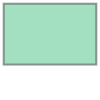

In [21]:
p

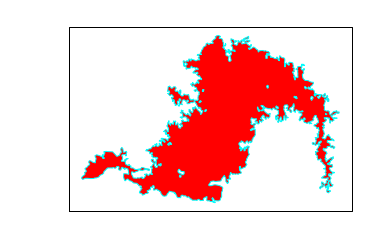

In [31]:
def drawBound(reservoir):
    from matplotlib.collections import PatchCollection
    from shapely.geometry import Polygon, MultiPolygon, shape, box, Point
    from shapely.affinity import scale
    from descartes import PolygonPatch
    from matplotlib import pyplot as plt
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    xmin, ymin, xmax, ymax = reservoir['geometry'].bounds
    w, h = xmax - xmin, ymax - ymin
    xmin -= 0.05*w
    xmax += 0.05*w
    ymin -= 0.05*h
    ymax += 0.05*h
    ax.set_xlim(xmin - 0.1*w, xmax + 0.1*w)
    ax.set_ylim(ymin - 0.1*h, ymax + 0.1*h)
    
    patches = []
    p = Polygon([(xmin,ymin), (xmax,ymin), (xmax,ymax), (xmin,ymax)])
    patches.append(PolygonPatch(p, fc='none', ec='black'))
    
    p = shape(reservoir['geometry'])
    patches.append(PolygonPatch(p, fc='red', ec='aqua', zorder=1))
    
    p = PatchCollection(patches, match_original=True)
    ax.add_collection(p)
    ax.axis('off')
    
    plt.show()
    return ax

drawBound(triAnReservoir)

In [36]:
import requests
import json
import datetime
import pandas as pd
import numpy as np

In [37]:
lat = 39.56499 # Input latitude
lon = -121.55527 # Input longitude
prod = 'MOD11A2' # MODIS product
data_band = 'LST_Day_1km' # Daytime LST band name
qc_band = 'QC_Day' # Daytime QC band name
above_below = 10 # km above/below
left_right = 10 # km left/right

In [39]:
dates = dates[dates.index('A2001001'):dates.index('A2001001')+138]

NameError: name 'dates' is not defined

NameError: name 'header' is not defined

In [42]:
import gdal
import matplotlib.pyplot as plt

ds = gdal.Open("/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf")
data = ds.GetRasterBand(1).ReadAsArray().astype(np.uint16)

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(data[0,:,:], cmap=plt.cm.Greys, vmin=1000, vmax=6000)

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [68]:
ds = gdal.Open("/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf")

In [69]:
ds.GetSubDatasets()

[('HDF4_EOS:EOS_GRID:"/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf":MODIS_Grid_2D:num_observations',
  '[4800x4800] num_observations MODIS_Grid_2D (8-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf":MODIS_Grid_2D:sur_refl_b01_1',
  '[4800x4800] sur_refl_b01_1 MODIS_Grid_2D (16-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf":MODIS_Grid_2D:sur_refl_b02_1',
  '[4800x4800] sur_refl_b02_1 MODIS_Grid_2D (16-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf":MODIS_Grid_2D:QC_250m_1',
  '[4800x4800] QC_250m_1 MODIS_Grid_2D (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf":MODIS_Grid_2D:obscov_1',
  '[4800x4800] obscov_1 MODIS_Grid_2D (8-bit integer)'),
 ('HDF4_EOS:EOS_GRID:"/home/lam

In [72]:
ds.GetSubDatasets()[0][0]

'HDF4_EOS:EOS_GRID:"/home/lamductan/Downloads/MODIS/MYD09GQ.A2018196.h27v06.006.2018198033958.hdf":MODIS_Grid_2D:num_observations'

In [73]:
def hdf_subdataset_extraction(hdf_file, dst_dir, subdataset):
    """unpack a single subdataset from a HDF5 container and write to GeoTiff"""
    # open the dataset
    hdf_ds = gdal.Open(hdf_file, gdal.GA_ReadOnly)
    band_ds = gdal.Open(hdf_ds.GetSubDatasets()[subdataset][0], gdal.GA_ReadOnly)

    # read into numpy array
    band_array = band_ds.ReadAsArray().astype(np.int16)

    # convert no_data values
    band_array[band_array == -28672] = -32768

    # build output path
    band_path = os.path.join(dst_dir, os.path.basename(os.path.splitext(hdf_file)[0]) + "-sd" + str(subdataset+1) + ".tif")

    # write raster
    out_ds = gdal.GetDriverByName('GTiff').Create(band_path,
                                                  band_ds.RasterXSize,
                                                  band_ds.RasterYSize,
                                                  1,  #Number of bands
                                                  gdal.GDT_Int16,
                                                  ['COMPRESS=LZW', 'TILED=YES'])
    out_ds.SetGeoTransform(band_ds.GetGeoTransform())
    out_ds.SetProjection(band_ds.GetProjection())
    out_ds.GetRasterBand(1).WriteArray(band_array)
    out_ds.GetRasterBand(1).SetNoDataValue(-32768)

    out_ds = None  #close dataset to write to disc

In [80]:
for i in range(1, len(ds.GetSubDatasets())):
    hdf_subdataset_extraction(hdf_file="/home/lamductan/Downloads/MODIS/A2014037040500.L2_LAC.SeAHABS.hdf",
                          dst_dir="/home/lamductan/Downloads/MODIS/tif",
                          subdataset=i)

In [81]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open('/home/lamductan/Downloads/MODIS/tif/MYD09GQ.A2018196.h27v06.006.2018198033958-sd3.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/site-packages/rasterio/features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


{'type': 'Polygon', 'coordinates': [[(107.589223, 30.0), (107.584706, 29.995833), (107.589517, 29.995833), (107.594034, 30.0), (107.589223, 30.0)]]}
{'type': 'Polygon', 'coordinates': [[(109.350141, 30.0), (109.34555, 29.995833), (109.350361, 29.995833), (109.354952, 30.0), (109.350141, 30.0)]]}
{'type': 'Polygon', 'coordinates': [[(109.55943, 30.0), (109.557131, 29.997917), (109.564347, 29.997917), (109.566647, 30.0), (109.55943, 30.0)]]}
{'type': 'Polygon', 'coordinates': [[(110.533709, 30.0), (110.531389, 29.997917), (110.5362, 29.997917), (110.53388, 29.995833), (110.536285, 29.995833), (110.538605, 29.997917), (110.541011, 29.997917), (110.538691, 29.995833), (110.541096, 29.995833), (110.538776, 29.99375), (110.541182, 29.99375), (110.538862, 29.991667), (110.541267, 29.991667), (110.538947, 29.989583), (110.541353, 29.989583), (110.543673, 29.991667), (110.548483, 29.991667), (110.546164, 29.989583), (110.55338, 29.989583), (110.555785, 29.989583), (110.558105, 29.991667), (110.

{'type': 'Polygon', 'coordinates': [[(103.181263, 29.179167), (103.179168, 29.177083), (103.181554, 29.177083), (103.17946, 29.175), (103.181846, 29.175), (103.179751, 29.172917), (103.182137, 29.172917), (103.180043, 29.170833), (103.177657, 29.170833), (103.172885, 29.170833), (103.170791, 29.16875), (103.173177, 29.16875), (103.171083, 29.166667), (103.180626, 29.166667), (103.178532, 29.164583), (103.183304, 29.164583), (103.179117, 29.160417), (103.18866, 29.160417), (103.190753, 29.1625), (103.188368, 29.1625), (103.190461, 29.164583), (103.192847, 29.164583), (103.195233, 29.164583), (103.199422, 29.16875), (103.197036, 29.16875), (103.19913, 29.170833), (103.196744, 29.170833), (103.198839, 29.172917), (103.201225, 29.172917), (103.20332, 29.175), (103.205706, 29.175), (103.208092, 29.175), (103.210187, 29.177083), (103.207801, 29.177083), (103.209897, 29.179167), (103.205124, 29.179167), (103.203029, 29.177083), (103.198257, 29.177083), (103.200352, 29.179167), (103.181263, 29

{'type': 'Polygon', 'coordinates': [[(113.676007, 29.104167), (113.673706, 29.102083), (113.671322, 29.102083), (113.669021, 29.1), (113.671405, 29.1), (113.669105, 29.097917), (113.671489, 29.097917), (113.669189, 29.095833), (113.671573, 29.095833), (113.673874, 29.097917), (113.676258, 29.097917), (113.673958, 29.095833), (113.676342, 29.095833), (113.671742, 29.091667), (113.674126, 29.091667), (113.669527, 29.0875), (113.664759, 29.0875), (113.667058, 29.089583), (113.659906, 29.089583), (113.662205, 29.091667), (113.659821, 29.091667), (113.662121, 29.09375), (113.659737, 29.09375), (113.662037, 29.095833), (113.659652, 29.095833), (113.661952, 29.097917), (113.657184, 29.097917), (113.654884, 29.095833), (113.6525, 29.095833), (113.6502, 29.09375), (113.647816, 29.09375), (113.645517, 29.091667), (113.643133, 29.091667), (113.638364, 29.091667), (113.636065, 29.089583), (113.628913, 29.089583), (113.631212, 29.091667), (113.62406, 29.091667), (113.626359, 29.09375), (113.619206,

{'type': 'Polygon', 'coordinates': [[(103.337417, 28.222917), (103.3354, 28.220833), (103.333036, 28.220833), (103.330671, 28.220833), (103.328655, 28.21875), (103.326291, 28.21875), (103.324275, 28.216667), (103.326639, 28.216667), (103.322608, 28.2125), (103.320243, 28.2125), (103.318228, 28.210417), (103.315864, 28.210417), (103.313849, 28.208333), (103.304392, 28.208333), (103.306407, 28.210417), (103.304043, 28.210417), (103.306058, 28.2125), (103.296601, 28.2125), (103.294587, 28.210417), (103.292222, 28.210417), (103.290208, 28.208333), (103.287844, 28.208333), (103.283815, 28.204167), (103.314547, 28.204167), (103.310519, 28.2), (103.312882, 28.2), (103.308854, 28.195833), (103.311218, 28.195833), (103.309204, 28.19375), (103.323387, 28.19375), (103.327415, 28.197917), (103.329779, 28.197917), (103.331794, 28.2), (103.32943, 28.2), (103.331445, 28.202083), (103.333809, 28.202083), (103.337839, 28.20625), (103.333111, 28.20625), (103.335126, 28.208333), (103.33749, 28.208333), (

{'type': 'Polygon', 'coordinates': [[(104.456451, 27.86875), (104.454443, 27.866667), (104.466226, 27.866667), (104.468234, 27.86875), (104.456451, 27.86875)]]}
{'type': 'Polygon', 'coordinates': [[(104.501228, 27.86875), (104.49721, 27.864583), (104.504279, 27.864583), (104.506288, 27.866667), (104.501575, 27.866667), (104.503584, 27.86875), (104.501228, 27.86875)]]}
{'type': 'Polygon', 'coordinates': [[(105.049659, 27.8875), (105.045617, 27.883333), (105.047974, 27.883333), (105.045953, 27.88125), (105.043596, 27.88125), (105.034168, 27.88125), (105.032148, 27.879167), (105.036861, 27.879167), (105.034841, 27.877083), (105.046625, 27.877083), (105.044605, 27.875), (105.046962, 27.875), (105.044942, 27.872917), (105.056725, 27.872917), (105.058746, 27.875), (105.056389, 27.875), (105.05841, 27.877083), (105.056053, 27.877083), (105.058073, 27.879167), (105.067501, 27.879167), (105.06548, 27.877083), (105.067837, 27.877083), (105.065816, 27.875), (105.079957, 27.875), (105.077936, 27.8

{'type': 'Polygon', 'coordinates': [[(111.214561, 27.616667), (111.210331, 27.6125), (111.215033, 27.6125), (111.217148, 27.614583), (111.214797, 27.614583), (111.216912, 27.616667), (111.214561, 27.616667)]]}
{'type': 'Polygon', 'coordinates': [[(104.452847, 27.614583), (104.45086, 27.6125), (104.453211, 27.6125), (104.451225, 27.610417), (104.453576, 27.610417), (104.457549, 27.614583), (104.452847, 27.614583)]]}
{'type': 'Polygon', 'coordinates': [[(110.281385, 27.614583), (110.27719, 27.610417), (110.284243, 27.610417), (110.28634, 27.6125), (110.283989, 27.6125), (110.286087, 27.614583), (110.281385, 27.614583)]]}
{'type': 'Polygon', 'coordinates': [[(112.454073, 27.6125), (112.451934, 27.610417), (112.456637, 27.610417), (112.458775, 27.6125), (112.454073, 27.6125)]]}
{'type': 'Polygon', 'coordinates': [[(103.936339, 27.610417), (103.934363, 27.608333), (103.943767, 27.608333), (103.945744, 27.610417), (103.936339, 27.610417)]]}
{'type': 'Polygon', 'coordinates': [[(107.368909, 2

{'type': 'Polygon', 'coordinates': [[(104.722324, 27.314583), (104.720357, 27.3125), (104.729736, 27.3125), (104.731703, 27.314583), (104.722324, 27.314583)]]}
{'type': 'Polygon', 'coordinates': [[(110.935454, 27.31875), (110.931287, 27.314583), (110.928942, 27.314583), (110.926597, 27.314583), (110.924514, 27.3125), (110.926859, 27.3125), (110.924776, 27.310417), (110.938844, 27.310417), (110.940927, 27.3125), (110.943272, 27.3125), (110.945356, 27.314583), (110.943011, 27.314583), (110.945094, 27.316667), (110.935715, 27.316667), (110.937799, 27.31875), (110.935454, 27.31875)]]}
{'type': 'Polygon', 'coordinates': [[(102.122396, 27.3125), (102.120478, 27.310417), (102.125168, 27.310417), (102.127085, 27.3125), (102.122396, 27.3125)]]}
{'type': 'Polygon', 'coordinates': [[(102.260735, 27.3125), (102.258815, 27.310417), (102.261159, 27.310417), (102.26308, 27.3125), (102.260735, 27.3125)]]}
{'type': 'Polygon', 'coordinates': [[(102.736715, 27.3125), (102.734786, 27.310417), (102.737131,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'type': 'Polygon', 'coordinates': [[(107.387989, 25.0125), (107.386167, 25.010417), (107.388466, 25.010417), (107.386644, 25.008333), (107.384345, 25.008333), (107.382524, 25.00625), (107.377926, 25.00625), (107.381569, 25.010417), (107.374672, 25.010417), (107.372851, 25.008333), (107.37515, 25.008333), (107.373329, 25.00625), (107.375627, 25.00625), (107.373806, 25.004167), (107.371508, 25.004167), (107.36691, 25.004167), (107.363269, 25.0), (107.365568, 25.0), (107.363747, 24.997917), (107.361449, 24.997917), (107.35915, 24.997917), (107.35733, 24.995833), (107.355031, 24.995833), (107.353211, 24.99375), (107.35551, 24.99375), (107.35369, 24.991667), (107.355989, 24.991667), (107.35417, 24.989583), (107.356468, 24.989583), (107.354649, 24.9875), (107.359246, 24.9875), (107.357426, 24.985417), (107.359725, 24.985417), (107.357906, 24.983333), (107.360204, 24.983333), (107.358385, 24.98125), (107.360684, 24.98125), (107.358865, 24.979167), (107.36576, 24.979167), (107.367579, 24.981

{'type': 'Polygon', 'coordinates': [[(104.287999, 24.758333), (104.28625, 24.75625), (104.290839, 24.75625), (104.292588, 24.758333), (104.287999, 24.758333)]]}
{'type': 'Polygon', 'coordinates': [[(102.54612, 24.79375), (102.544398, 24.791667), (102.542103, 24.791667), (102.537514, 24.791667), (102.535792, 24.789583), (102.540381, 24.789583), (102.538659, 24.7875), (102.536364, 24.7875), (102.52948, 24.7875), (102.526037, 24.783333), (102.528332, 24.783333), (102.526611, 24.78125), (102.528905, 24.78125), (102.527184, 24.779167), (102.529479, 24.779167), (102.527758, 24.777083), (102.532347, 24.777083), (102.530627, 24.775), (102.535216, 24.775), (102.528334, 24.766667), (102.52604, 24.766667), (102.521451, 24.766667), (102.523171, 24.76875), (102.520877, 24.76875), (102.522597, 24.770833), (102.520302, 24.770833), (102.518582, 24.76875), (102.513993, 24.76875), (102.515713, 24.770833), (102.518008, 24.770833), (102.520302, 24.770833), (102.522023, 24.772917), (102.512845, 24.772917),

{'type': 'Polygon', 'coordinates': [[(103.200336, 24.508333), (103.198625, 24.50625), (103.205494, 24.50625), (103.207205, 24.508333), (103.200336, 24.508333)]]}
{'type': 'Polygon', 'coordinates': [[(108.792518, 24.54375), (108.790712, 24.541667), (108.788422, 24.541667), (108.783841, 24.541667), (108.782035, 24.539583), (108.777455, 24.539583), (108.779261, 24.541667), (108.77239, 24.541667), (108.768779, 24.5375), (108.766489, 24.5375), (108.764198, 24.5375), (108.760588, 24.533333), (108.767458, 24.533333), (108.763848, 24.529167), (108.770718, 24.529167), (108.768914, 24.527083), (108.771204, 24.527083), (108.769399, 24.525), (108.771689, 24.525), (108.769885, 24.522917), (108.772174, 24.522917), (108.768566, 24.51875), (108.773146, 24.51875), (108.769538, 24.514583), (108.774118, 24.514583), (108.770511, 24.510417), (108.77509, 24.510417), (108.771484, 24.50625), (108.773773, 24.50625), (108.771971, 24.504167), (108.77426, 24.504167), (108.772457, 24.502083), (108.783905, 24.50208

{'type': 'Polygon', 'coordinates': [[(107.781341, 24.277083), (107.779574, 24.275), (107.781859, 24.275), (107.780092, 24.272917), (107.782377, 24.272917), (107.78061, 24.270833), (107.782895, 24.270833), (107.781128, 24.26875), (107.787984, 24.26875), (107.789751, 24.270833), (107.785181, 24.270833), (107.786948, 24.272917), (107.784663, 24.272917), (107.78643, 24.275), (107.784145, 24.275), (107.785912, 24.277083), (107.781341, 24.277083)]]}
{'type': 'Polygon', 'coordinates': [[(109.609693, 24.277083), (109.606098, 24.272917), (109.610669, 24.272917), (109.607075, 24.26875), (109.611646, 24.26875), (109.613443, 24.270833), (109.611157, 24.270833), (109.614752, 24.275), (109.610181, 24.275), (109.611979, 24.277083), (109.609693, 24.277083)]]}
{'type': 'Polygon', 'coordinates': [[(98.849843, 24.277083), (98.848222, 24.275), (98.845936, 24.275), (98.844315, 24.272917), (98.846601, 24.272917), (98.84498, 24.270833), (98.847265, 24.270833), (98.845645, 24.26875), (98.854786, 24.26875), (9

{'type': 'Polygon', 'coordinates': [[(100.793635, 24.183333), (100.791989, 24.18125), (100.789705, 24.18125), (100.787421, 24.18125), (100.785776, 24.179167), (100.783492, 24.179167), (100.781847, 24.177083), (100.779563, 24.177083), (100.772713, 24.177083), (100.769423, 24.172917), (100.771706, 24.172917), (100.768418, 24.16875), (100.766134, 24.16875), (100.763851, 24.16875), (100.760562, 24.164583), (100.762846, 24.164583), (100.761202, 24.1625), (100.763486, 24.1625), (100.761842, 24.160417), (100.764125, 24.160417), (100.760838, 24.15625), (100.758555, 24.15625), (100.756912, 24.154167), (100.759195, 24.154167), (100.757552, 24.152083), (100.759836, 24.152083), (100.75655, 24.147917), (100.758833, 24.147917), (100.757191, 24.145833), (100.759474, 24.145833), (100.757832, 24.14375), (100.760115, 24.14375), (100.758473, 24.141667), (100.760756, 24.141667), (100.759114, 24.139583), (100.761397, 24.139583), (100.758113, 24.135417), (100.760396, 24.135417), (100.758755, 24.133333), (10

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'type': 'Polygon', 'coordinates': [[(97.330613, 22.0125), (97.329183, 22.010417), (97.326936, 22.010417), (97.325505, 22.008333), (97.329999, 22.008333), (97.332246, 22.008333), (97.333677, 22.010417), (97.33143, 22.010417), (97.332861, 22.0125), (97.330613, 22.0125)]]}
{'type': 'Polygon', 'coordinates': [[(97.551647, 22.010417), (97.550213, 22.008333), (97.55246, 22.008333), (97.553894, 22.010417), (97.551647, 22.010417)]]}
{'type': 'Polygon', 'coordinates': [[(97.117954, 22.010417), (97.116527, 22.008333), (97.11428, 22.008333), (97.112033, 22.008333), (97.110605, 22.00625), (97.1151, 22.00625), (97.117347, 22.00625), (97.120201, 22.010417), (97.117954, 22.010417)]]}
{'type': 'Polygon', 'coordinates': [[(97.570807, 22.18125), (97.567915, 22.177083), (97.570164, 22.177083), (97.567272, 22.172917), (97.565023, 22.172917), (97.562773, 22.172917), (97.564219, 22.175), (97.559719, 22.175), (97.558274, 22.172917), (97.560523, 22.172917), (97.559078, 22.170833), (97.554578, 22.170833), (9

{'type': 'Polygon', 'coordinates': [[(105.818715, 21.61875), (105.81719, 21.616667), (105.821672, 21.616667), (105.820148, 21.614583), (105.824629, 21.614583), (105.827679, 21.61875), (105.818715, 21.61875)]]}
{'type': 'Polygon', 'coordinates': [[(97.106656, 21.616667), (97.105257, 21.614583), (97.107498, 21.614583), (97.108897, 21.616667), (97.106656, 21.616667)]]}
{'type': 'Polygon', 'coordinates': [[(97.223185, 21.616667), (97.221784, 21.614583), (97.224025, 21.614583), (97.225426, 21.616667), (97.223185, 21.616667)]]}
{'type': 'Polygon', 'coordinates': [[(97.991828, 21.616667), (97.990416, 21.614583), (97.994898, 21.614583), (97.996309, 21.616667), (97.991828, 21.616667)]]}
{'type': 'Polygon', 'coordinates': [[(98.047851, 21.616667), (98.046438, 21.614583), (98.048679, 21.614583), (98.050092, 21.616667), (98.047851, 21.616667)]]}
{'type': 'Polygon', 'coordinates': [[(98.106116, 21.616667), (98.104702, 21.614583), (98.106943, 21.614583), (98.108356, 21.616667), (98.106116, 21.616667

{'type': 'Polygon', 'coordinates': [[(97.8443, 21.370833), (97.842908, 21.36875), (97.840671, 21.36875), (97.839279, 21.366667), (97.834805, 21.366667), (97.836197, 21.36875), (97.831722, 21.36875), (97.830331, 21.366667), (97.828094, 21.366667), (97.826702, 21.364583), (97.831176, 21.364583), (97.828393, 21.360417), (97.83063, 21.360417), (97.829239, 21.358333), (97.827002, 21.358333), (97.824221, 21.354167), (97.821984, 21.354167), (97.820593, 21.352083), (97.82283, 21.352083), (97.82144, 21.35), (97.832624, 21.35), (97.829843, 21.345833), (97.834317, 21.345833), (97.836553, 21.345833), (97.837944, 21.347917), (97.835707, 21.347917), (97.837097, 21.35), (97.834861, 21.35), (97.836251, 21.352083), (97.834014, 21.352083), (97.836796, 21.35625), (97.834559, 21.35625), (97.83595, 21.358333), (97.833713, 21.358333), (97.835104, 21.360417), (97.832867, 21.360417), (97.834259, 21.3625), (97.836496, 21.3625), (97.837887, 21.364583), (97.840124, 21.364583), (97.838733, 21.3625), (97.847681, 2

{'type': 'Polygon', 'coordinates': [[(100.301273, 21.197917), (100.299859, 21.195833), (100.302094, 21.195833), (100.300679, 21.19375), (100.302914, 21.19375), (100.304328, 21.195833), (100.306563, 21.195833), (100.307977, 21.197917), (100.301273, 21.197917)]]}
{'type': 'Polygon', 'coordinates': [[(100.996212, 21.197917), (100.993364, 21.19375), (100.995598, 21.19375), (100.998446, 21.197917), (100.996212, 21.197917)]]}
{'type': 'Polygon', 'coordinates': [[(105.735646, 21.197917), (105.734155, 21.195833), (105.73639, 21.195833), (105.734899, 21.19375), (105.739368, 21.19375), (105.74235, 21.197917), (105.735646, 21.197917)]]}
{'type': 'Polygon', 'coordinates': [[(106.193725, 21.197917), (106.192227, 21.195833), (106.194462, 21.195833), (106.192964, 21.19375), (106.197433, 21.19375), (106.200428, 21.197917), (106.193725, 21.197917)]]}
{'type': 'Polygon', 'coordinates': [[(106.204897, 21.197917), (106.2034, 21.195833), (106.205634, 21.195833), (106.204137, 21.19375), (106.206371, 21.1937

{'type': 'Polygon', 'coordinates': [[(104.709501, 21.010417), (104.708039, 21.008333), (104.705807, 21.008333), (104.703575, 21.008333), (104.702113, 21.00625), (104.704345, 21.00625), (104.702883, 21.004167), (104.705115, 21.004167), (104.703653, 21.002083), (104.717043, 21.002083), (104.719274, 21.002083), (104.720736, 21.004167), (104.71181, 21.004167), (104.713272, 21.00625), (104.71104, 21.00625), (104.713964, 21.010417), (104.709501, 21.010417)]]}
{'type': 'Polygon', 'coordinates': [[(96.935987, 21.00625), (96.93328, 21.002083), (96.935512, 21.002083), (96.938218, 21.00625), (96.935987, 21.00625)]]}
{'type': 'Polygon', 'coordinates': [[(98.819496, 21.00625), (98.816737, 21.002083), (98.8212, 21.002083), (98.81982, 21.0), (98.824283, 21.0), (98.825663, 21.002083), (98.823431, 21.002083), (98.824811, 21.004167), (98.820348, 21.004167), (98.821727, 21.00625), (98.819496, 21.00625)]]}
{'type': 'Polygon', 'coordinates': [[(98.848507, 21.00625), (98.847127, 21.004167), (98.85159, 21.00

{'type': 'Polygon', 'coordinates': [[(100.120782, 20.822917), (100.119398, 20.820833), (100.126084, 20.820833), (100.123316, 20.816667), (100.125545, 20.816667), (100.129698, 20.822917), (100.120782, 20.822917)]]}
{'type': 'Polygon', 'coordinates': [[(104.250968, 20.822917), (104.248085, 20.81875), (104.252543, 20.81875), (104.253984, 20.820833), (104.256213, 20.820833), (104.257655, 20.822917), (104.250968, 20.822917)]]}
{'type': 'Polygon', 'coordinates': [[(97.239675, 20.820833), (97.238331, 20.81875), (97.240559, 20.81875), (97.241904, 20.820833), (97.239675, 20.820833)]]}
{'type': 'Polygon', 'coordinates': [[(103.291105, 20.820833), (103.288248, 20.816667), (103.292706, 20.816667), (103.294134, 20.81875), (103.291905, 20.81875), (103.293333, 20.820833), (103.291105, 20.820833)]]}
{'type': 'Polygon', 'coordinates': [[(103.295562, 20.820833), (103.294134, 20.81875), (103.298592, 20.81875), (103.30002, 20.820833), (103.295562, 20.820833)]]}
{'type': 'Polygon', 'coordinates': [[(100.10

{'type': 'Polygon', 'coordinates': [[(106.672714, 20.60625), (106.671256, 20.604167), (106.677933, 20.604167), (106.679391, 20.60625), (106.672714, 20.60625)]]}
{'type': 'Polygon', 'coordinates': [[(96.424943, 20.6125), (96.423624, 20.610417), (96.42585, 20.610417), (96.424531, 20.608333), (96.426757, 20.608333), (96.42412, 20.604167), (96.421895, 20.604167), (96.420577, 20.602083), (96.422802, 20.602083), (96.421484, 20.6), (96.425936, 20.6), (96.424618, 20.597917), (96.429069, 20.597917), (96.427751, 20.595833), (96.429977, 20.595833), (96.431295, 20.597917), (96.43352, 20.597917), (96.434838, 20.6), (96.430387, 20.6), (96.434342, 20.60625), (96.436567, 20.60625), (96.437886, 20.608333), (96.431209, 20.608333), (96.432527, 20.610417), (96.428076, 20.610417), (96.429394, 20.6125), (96.424943, 20.6125)]]}
{'type': 'Polygon', 'coordinates': [[(97.603743, 20.604167), (97.601075, 20.6), (97.6033, 20.6), (97.604634, 20.602083), (97.60686, 20.602083), (97.608194, 20.604167), (97.603743, 20.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'type': 'Polygon', 'coordinates': [[(105.958036, 20.002083), (105.956634, 20.0), (105.958851, 20.0), (105.960253, 20.002083), (105.958036, 20.002083)]]}
{'type': 'Polygon', 'coordinates': [[(105.964687, 20.002083), (105.963285, 20.0), (105.972153, 20.0), (105.973555, 20.002083), (105.964687, 20.002083)]]}
{'type': 'Polygon', 'coordinates': [[(105.975772, 20.002083), (105.97437, 20.0), (105.978804, 20.0), (105.980207, 20.002083), (105.975772, 20.002083)]]}
{'type': 'Polygon', 'coordinates': [[(105.991292, 20.002083), (105.989889, 20.0), (105.994323, 20.0), (105.995726, 20.002083), (105.991292, 20.002083)]]}
{'type': 'Polygon', 'coordinates': [[(106.057085, 20.04375), (106.054272, 20.039583), (106.056489, 20.039583), (106.053676, 20.035417), (106.051459, 20.035417), (106.050053, 20.033333), (106.05227, 20.033333), (106.049458, 20.029167), (106.047241, 20.029167), (106.04443, 20.025), (106.046647, 20.025), (106.043837, 20.020833), (106.048272, 20.020833), (106.045462, 20.016667), (106.04